### Лабораторная работа 10
### Ананьев Роман 

In [8]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import random
%matplotlib inline 

# Задание 1
 <!-- Сгенерируйте выборку объема n двумерного нормаль-
ного распределения с параметрами X
m , Y m , X
 , Y  ,  и выполните
следующие действия:
1) постройте диаграмму рассеяния;
2) постройте гистограммы компонент;
3) найдите выборочные характеристики компонент;
4) найдите выборочное значение коэффициента корреляции Пир-
сона;
5) постройте доверительный интервал для коэффициента корреля-
ции Пирсона;
6) проверьте гипотезу о значимости коэффициента корреляции
Пирсона. -->

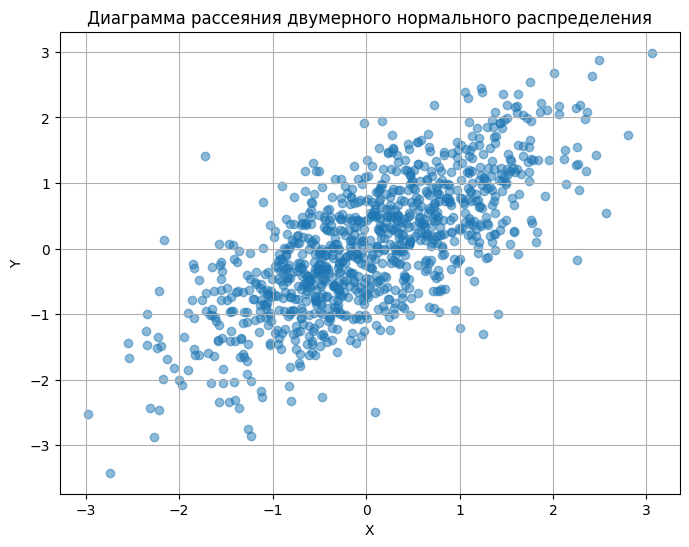

In [9]:
# Параметры распределения
m_X, m_Y = 0, 0
sigma_X, sigma_Y = 1, 1
rho = 0.7
n = 1000

# Ковариационная матрица
cov_matrix = np.array([
    [sigma_X**2, rho * sigma_X * sigma_Y],
    [rho * sigma_X * sigma_Y, sigma_Y**2]
])

# Генерация выборки
data = np.random.multivariate_normal(mean=[m_X, m_Y], cov=cov_matrix, size=n)
X = data[:, 0]
Y = data[:, 1]

# 1) Диаграмма рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.title("Диаграмма рассеяния двумерного нормального распределения")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


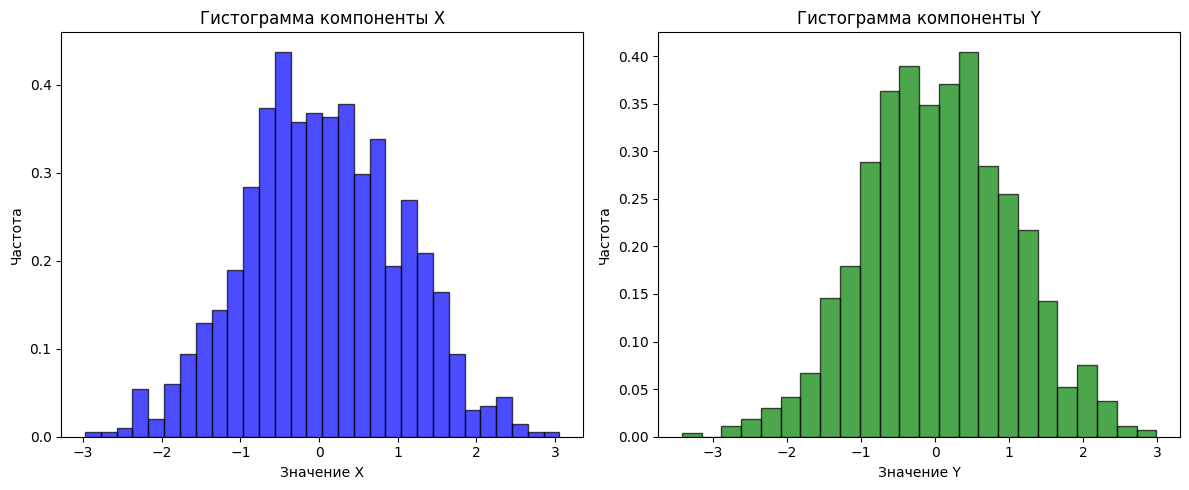

In [10]:
# 2) Гистограммы компонент
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X, bins=30, density=True, alpha=0.7, color='blue', edgecolor="black")
plt.title("Гистограмма компоненты X")
plt.xlabel("Значение X")
plt.ylabel("Частота")

plt.subplot(1, 2, 2)
plt.hist(Y,  bins='fd', density=True, alpha=0.7, color='green', edgecolor="black")
plt.title("Гистограмма компоненты Y")
plt.xlabel("Значение Y")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

In [11]:
# 3) Выборочные характеристики
mean_X, mean_Y = np.mean(X), np.mean(Y)
var_X, var_Y = np.var(X, ddof=1), np.var(Y, ddof=1)  # несмещённая оценка
std_X, std_Y = np.std(X, ddof=1), np.std(Y, ddof=1)
cov_XY = np.cov(X, Y, ddof=1)[0, 1]
corr_XY = np.corrcoef(X, Y)

print("Выборочные характеристики:")
print(f"Среднее X: {mean_X:.4f}, Среднее Y: {mean_Y:.4f}")
print(f"Дисперсия X: {var_X:.4f}, Дисперсия Y: {var_Y:.4f}")
print(f"Стандартное отклонение X: {std_X:.4f}, Y: {std_Y:.4f}")
print(f"Ковариация X и Y: {cov_XY:.4f}")
print(f"Корреляционная матрица: ")
corr_XY

Выборочные характеристики:
Среднее X: 0.0412, Среднее Y: 0.0415
Дисперсия X: 0.9655, Дисперсия Y: 0.9785
Стандартное отклонение X: 0.9826, Y: 0.9892
Ковариация X и Y: 0.6953
Корреляционная матрица: 


array([[1.        , 0.71531926],
       [0.71531926, 1.        ]])

In [12]:
#4) Выборочное значение коэффициента корреляции Пирсона
corr_XY = sts.pearsonr(X, Y)[0]
corr_XY

np.float64(0.7153192631071833)

In [13]:
#5) Доверительный интервал для коэффициента корреляции
z_r = np.arctanh(corr_XY)  
SE_z = 1 / np.sqrt(n - 3)  
alpha =  0.05
z_lower = z_r - sts.norm.ppf(1 - alpha/2) * SE_z
z_upper = z_r + sts.norm.ppf(1 - alpha/2) * SE_z

# Обратное преобразование
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)
print(f"95% доверительный интервал для коэффициента корреляции: ({r_lower:.4f}, {r_upper:.4f})")

95% доверительный интервал для коэффициента корреляции: (0.6836, 0.7443)


In [14]:
#6) Проверка гипотезы о значимости коэффициента корреляции Пирсона
#H0: ρ = 0 (корреляция отсутствует)
#H1: ρ != 0 (корреляция есть)
t_stat = corr_XY * np.sqrt(n - 2) / np.sqrt(1 - corr_XY**2)
t_crit = sts.t.ppf(1 - alpha/2, df=n-2)

print(f"t-stat {t_stat:.4f}")
print(f"Z_crit (двусторонний тест): (-{t_crit:.4f}; {t_crit:.4f})")

print("Т.к. t_stat > t_crit Отвергаем H0: корреляция значима (ρ != 0).")

t-stat 32.3380
Z_crit (двусторонний тест): (-1.9623; 1.9623)
Т.к. t_stat > t_crit Отвергаем H0: корреляция значима (ρ != 0).


# Задание 2
<!-- Случайный вектор  , X Y распределена по круговому
нормальному закону (𝜌 , = 0, 𝜎 = 𝜎 = 1). Пусть V X Y 
,
0, 5 W X Y  .
 2 2
1) Подтвердите или опровергните гипотезу о том, что случайные
величины распределены по нормальному закону (для проверки исполь-
зуйте критерий Шапиро-Уилка, Q-Q график).
2) Методом статистического эксперимента исследуйте вопрос о
корреляционной зависимости величин V и W (какой коэффициент
корреляции корректно использовать?). Возникшую гипотезу проверьте
с помощью подходящего критерия. -->

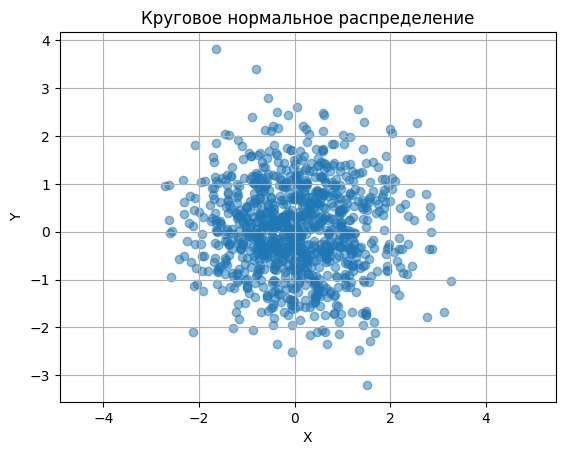

In [15]:
sigma = 1
cov_matrix = np.array([[sigma**2, 0], [0, sigma**2]])

data = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix, size=1000)
x, y = data[:, 0], data[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.title("Круговое нормальное распределение")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")  # Сохранение пропорций осей
plt.grid()
plt.show()

In [16]:
v = x * y
w = (x**2 - y**2) / 2

#### 2.1

In [17]:
sts.shapiro(v)

ShapiroResult(statistic=np.float64(0.8984593806690514), pvalue=np.float64(3.497346666737218e-25))

In [18]:
sts.shapiro(w)

ShapiroResult(statistic=np.float64(0.9147971063357863), pvalue=np.float64(2.9142303707797164e-23))

Text(0.5, 1.0, 'Q-Q график для V')

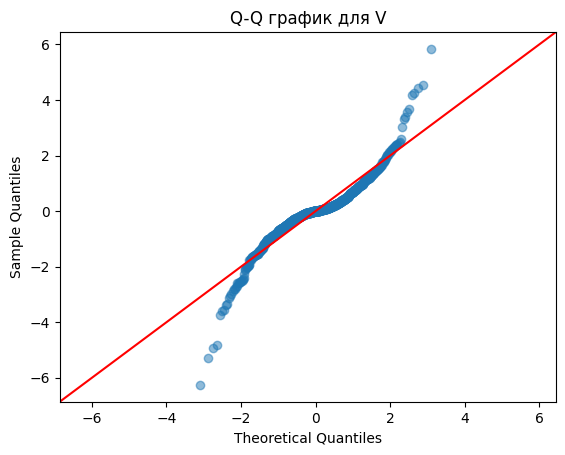

In [19]:
import statsmodels.api as sm 

sm.qqplot(v, line='45', alpha=0.5)
plt.title("Q-Q график для V")

Text(0.5, 1.0, 'Q-Q график для W')

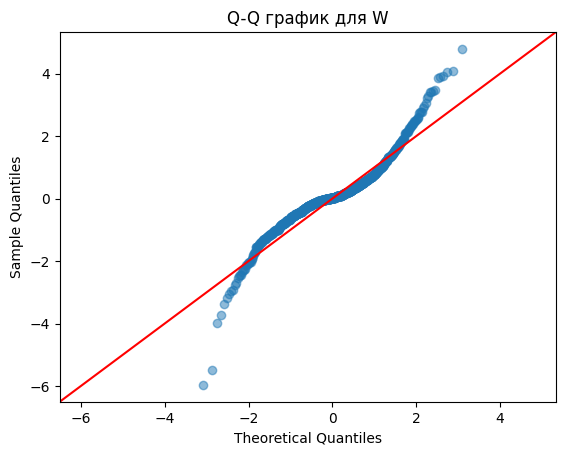

In [20]:
sm.qqplot(w, line='45', alpha=0.5)
plt.title("Q-Q график для W")

Из QQ графиков видно, что случайные величины v и w не распределены по нормальному закону, это же подтверждается маленькими значениями p-value при использовании критерия Шапиро-Уилка

#### 2.2

In [21]:
corr_vw = np.corrcoef(v, w)[1][0]
corr_vw

np.float64(0.073121953505243)

In [22]:
n = len(v)
vv = [(v[i],i) for i in range(n)]
vv = sorted(vv)
vv = [_[1] for _ in vv]

ww = [(w[i],i) for i in range(n)]
ww = sorted(ww)
ww = [_[1] for _ in ww]

df = [(ww[i] - vv[i])**2 for i in range (n)]
rs = 1 - 6 * sum(df) / (n * (n**2 - 1))

t_stat = abs(rs) * np.sqrt((n-2)/(1-rs**2))
p_value = 2 * (1 - sts.t.cdf(t_stat, df=n-2))
p_value

np.float64(0.04753815889740132)

Гипотеза об отсутствии регрессионной зависимости подтверждается на больших уровнях значимости при многочисленных экспериметнах => гипотезу принимаем